# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
unique_mice_count = merged_data["Mouse ID"].nunique()
print("Number of unique mice IDs:", unique_mice_count)

Number of unique mice IDs: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
print("Data associated with duplicate Mouse ID and Timepoint:")
print(duplicates)

Data associated with duplicate Mouse ID and Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouse_id = 'your_duplicate_mouse_id_here'
duplicate_data = merged_data[merged_data["Mouse ID"] == duplicate_mouse_id]
print("Data for Duplicate Mouse ID:", duplicate_mouse_id)
print(duplicate_data)

Data for Duplicate Mouse ID: your_duplicate_mouse_id_here
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
unique_mice_count_cleaned = cleaned_data["Mouse ID"].nunique()
print("Number of unique mice IDs in the cleaned DataFrame:", unique_mice_count_cleaned)

Number of unique mice IDs in the cleaned DataFrame: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
#summary_stats.rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'}, inplace=True)
#print(summary_stats)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

#summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])


# mean, median, variance, standard deviation, and SEM of the tumor volume. 



# Assemble the resulting series into a single summary DataFrame.

mean_tumor_volume=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_std_dev=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem=cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":mean_tumor_volume, "Median":median_tumor_volume, "Variance":tumor_volume_variance, 
"Std":tumor_volume_std_dev, "Sem":tumor_volume_sem})
print("Summary Statistics of Tumor Volume for Each Regimen:")
print(summary_df)

Summary Statistics of Tumor Volume for Each Regimen:
                   Mean     Median   Variance       Std       Sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
summary_table = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
print(summary_table)


             Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

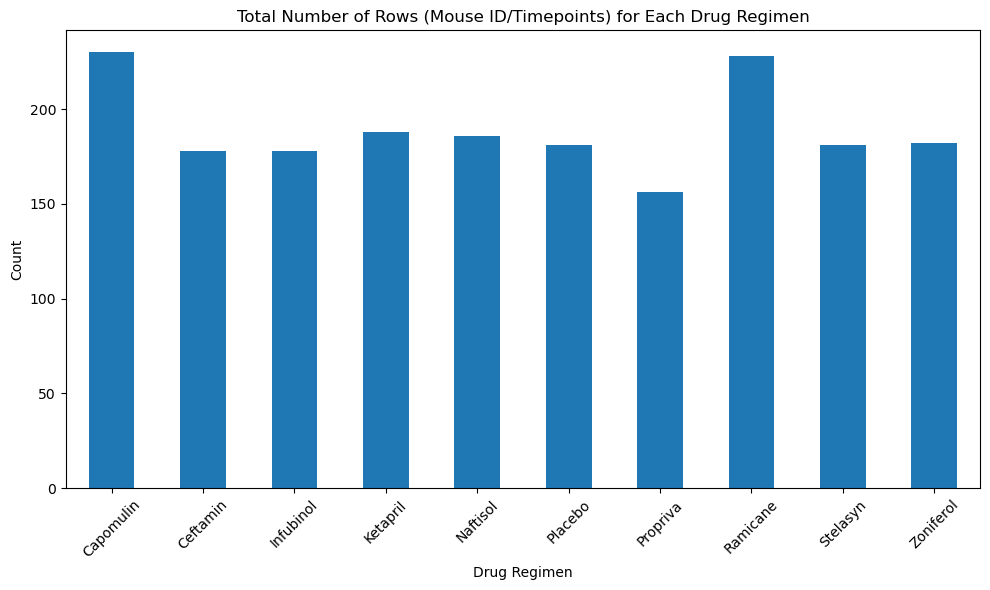

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_data.groupby("Drug Regimen")["Mouse ID"].count()

regimen_counts.plot(kind="bar", figsize=(10, 6))
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

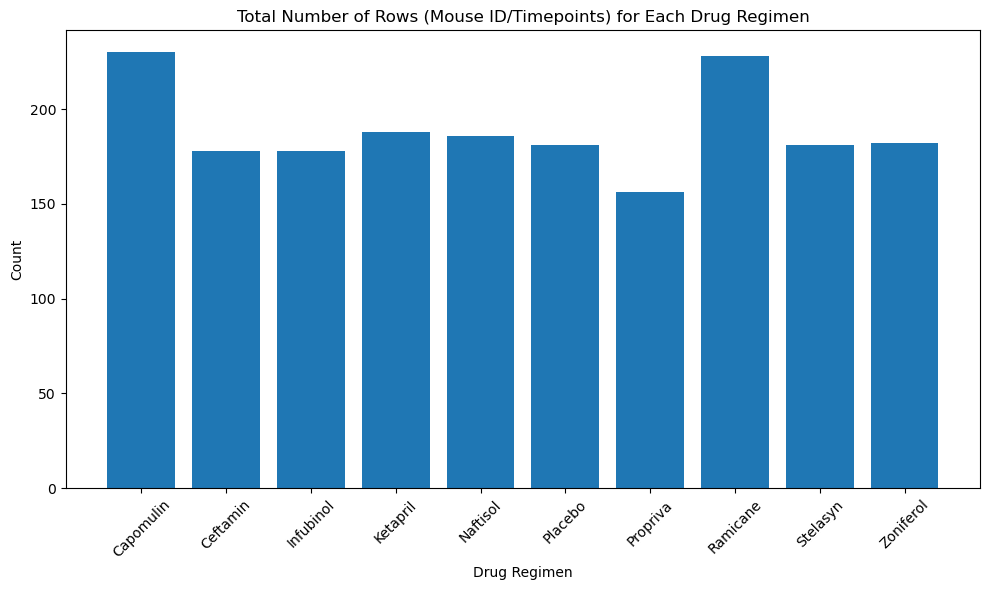

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = cleaned_data.groupby("Drug Regimen")["Mouse ID"].count()

plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

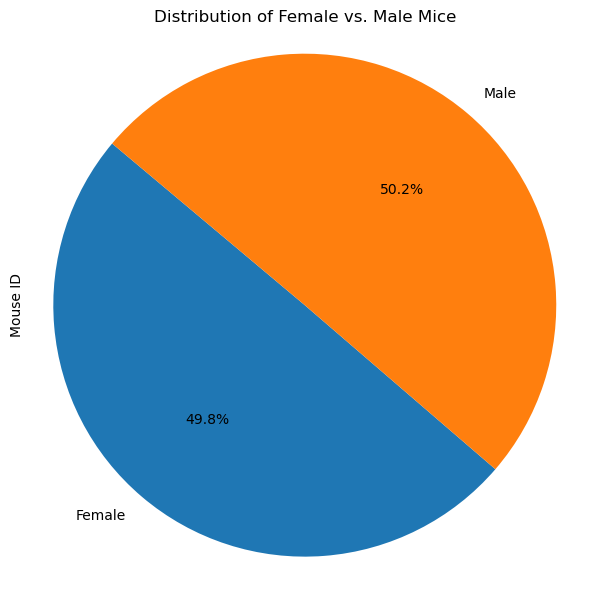

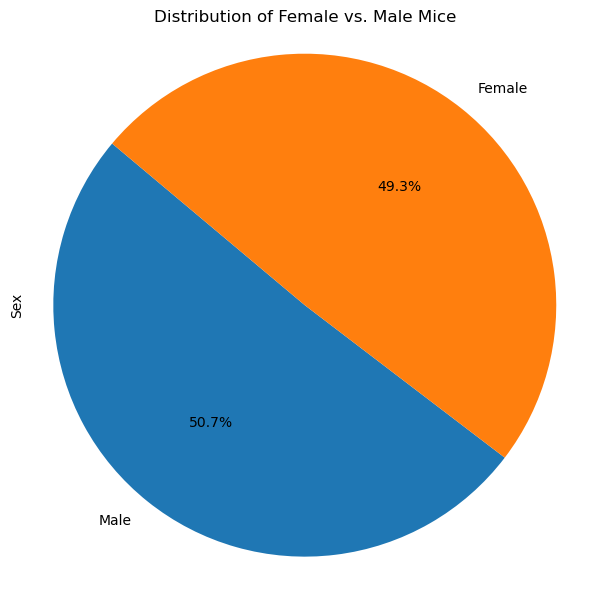

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_data.groupby("Sex")["Mouse ID"].nunique()
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, figsize=(6, 6))
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.tight_layout()
plt.show()
# Create a pie plot using Pandas plot() method
gender_counts = cleaned_data["Sex"].value_counts()
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=140, figsize=(6, 6))
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.tight_layout()
plt.show()

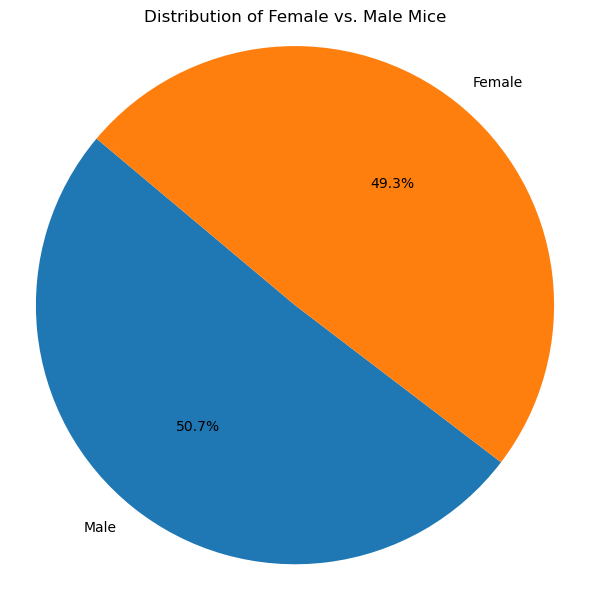

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_data["Sex"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filter the cleaned DataFrame to include only the specified treatment regimens
selected_treatments = cleaned_data[cleaned_data["Drug Regimen"].isin(treatment_regimens)]

# Group the filtered DataFrame by "Mouse ID" and calculate the final tumor volume for each mouse
final_tumor_volumes = selected_treatments.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

# Display the final tumor volumes
print("Final Tumor Volumes for Each Mouse:")
print(final_tumor_volumes)

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()
print("Last Timepoint for Each Mouse:")
print(last_timepoints)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max()

merged_last_timepoints = pd.merge(cleaned_data, last_timepoints, on=["Mouse ID", "Timepoint"])

print("Merged DataFrame with Tumor Volume at Last Timepoint:")
print(merged_last_timepoints)

Final Tumor Volumes for Each Mouse:
Mouse ID
a203    67.973419
a251    65.525743
a275    62.999356
a411    45.466677
a444    45.000000
          ...    
y769    68.594745
y793    45.000000
y865    64.729837
z578    45.000000
z581    62.754451
Name: Tumor Volume (mm3), Length: 100, dtype: float64
Last Timepoint for Each Mouse:
Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64
Merged DataFrame with Tumor Volume at Last Timepoint:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       k403     Ramicane    Male          21          16         45   
1       s185    Capomulin  Female           3          17         45   
2       x401    Capomulin  Female          16          15         45   
3       m601    Capomulin    Male          22          17         45   
4       g791     Ramicane    Male          11          16         45   
..       ... 

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = cleaned_data["Drug Regimen"].unique().tolist()

print("List of Treatments:")
print(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
print("Empty List for Tumor Volume Data:")
print(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# Choose a specific treatment regimen (e.g., "Capomulin")
selected_treatment = "Capomulin"

# Filter the merged DataFrame for the selected treatment regimen
selected_regimen_data = merged_last_timepoints[merged_last_timepoints["Drug Regimen"] == selected_treatment]

# Calculate the IQR for tumor volume
quartiles = selected_regimen_data["Tumor Volume (mm3)"].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1

# Determine potential outliers using the IQR criterion
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Identify potential outliers
potential_outliers = selected_regimen_data[
    (selected_regimen_data["Tumor Volume (mm3)"] < lower_bound) |
    (selected_regimen_data["Tumor Volume (mm3)"] > upper_bound)
]

# Display the IQR, lower bound, upper bound, and potential outliers
print("IQR for", selected_treatment, ":", iqr)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Potential Outliers:")
print(potential_outliers)


List of Treatments:
['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
Empty List for Tumor Volume Data:
[]
IQR for Capomulin : 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers:
Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Sex, Age_months, Weight (g), Timepoint, Tumor Volume (mm3), Metastatic Sites]
Index: []


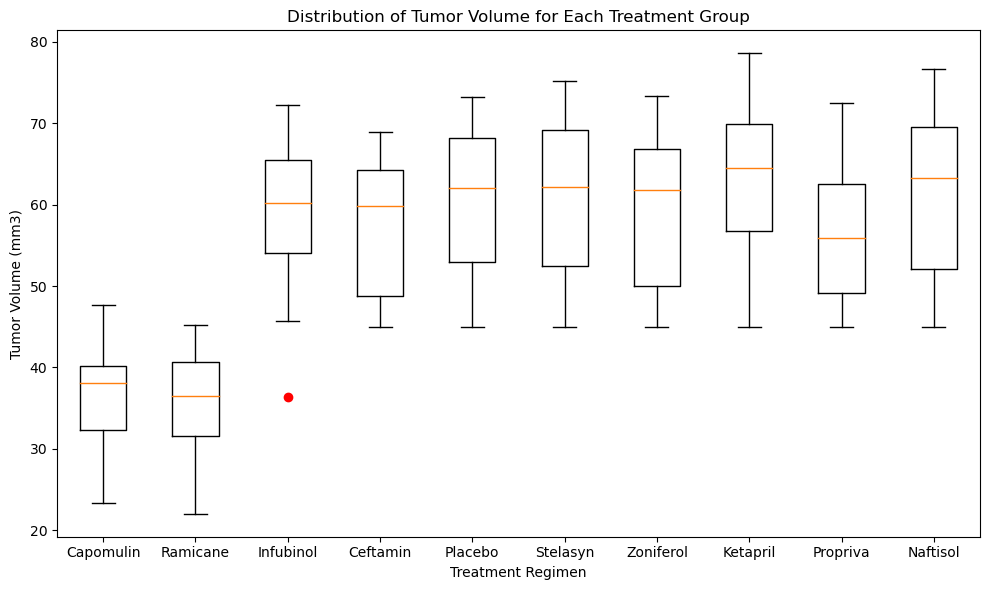

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a dictionary to store tumor volume data for each treatment regimen
tumor_volume_data = {
    "Capomulin": [],
    "Ramicane": [],
    "Infubinol": [],
    "Ceftamin": [],
    "Placebo":[],
    "Stelasyn":[],
    "Zoniferol":[],
    "Ketapril":[],
    "Propriva":[],
    "Naftisol": []
}
data_sets = [tumor_volume_data[treatment] for treatment in treatments]
# Loop through each treatment regimen and populate the data dictionary
# Loop through each treatment regimen and populate the data dictionary
for treatment in treatments:
    # Filter the merged DataFrame for the current treatment regimen
    regimen_data = merged_last_timepoints[merged_last_timepoints["Drug Regimen"] == treatment]

    # Get the tumor volume data for the current treatment regimen
    tumor_volumes = regimen_data["Tumor Volume (mm3)"]

    # Append the tumor volume data to the data dictionary
    tumor_volume_data[treatment].extend(tumor_volumes)
    
data_sets = list(tumor_volume_data.values())
# Create a list of labels for the x-axis
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin", "Placebo", 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

# Create a box plot using Matplotlib's boxplot() function
plt.figure(figsize=(10, 6))
plt.boxplot(data_sets, labels=labels, sym="r")
plt.title("Distribution of Tumor Volume for Each Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()
plt.show()

## Line and Scatter Plots

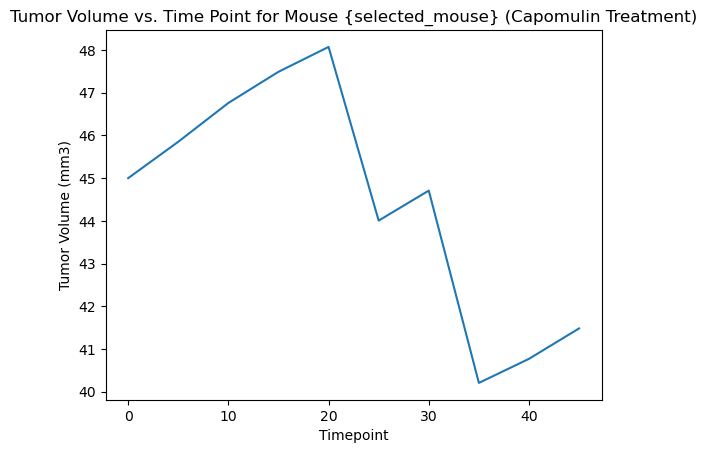

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Choose a specific mouse ID treated with Capomulin (replace with the desired mouse ID)
selected_mouse_data = cleaned_data.loc[cleaned_data['Drug Regimen'] == "Capomulin"]
mousedata = selected_mouse_data.loc[selected_mouse_data['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for Mouse {selected_mouse} (Capomulin Treatment)')
plt.show()

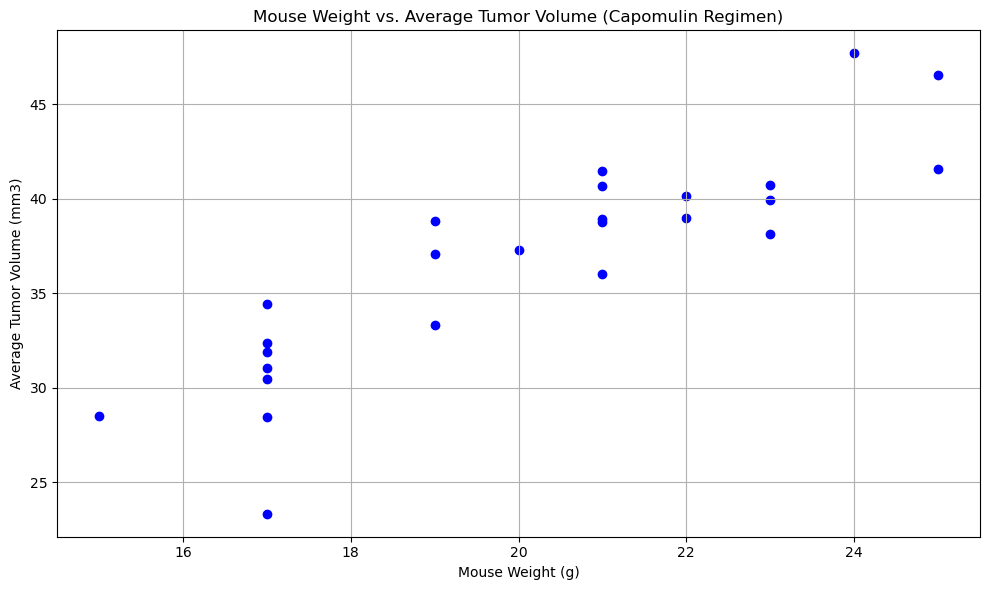

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the merged DataFrame for the Capomulin treatment
capomulin_data = merged_last_timepoints[merged_last_timepoints["Drug Regimen"] == "Capomulin"]

# Group the Capomulin data by "Mouse ID" and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights for the average tumor volumes
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot using Matplotlib's scatter() function
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker="o", color="blue")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

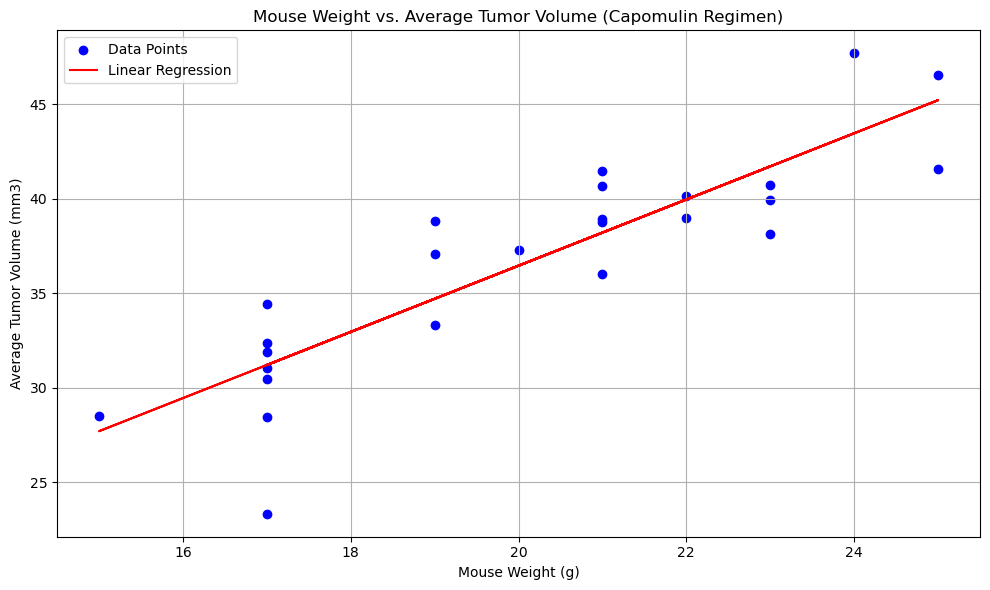

Correlation Coefficient: 0.8767060403658113
Linear Regression:
Slope: 1.7504682289585034
Intercept: 1.4481469525549073


In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Filter the merged DataFrame for the Capomulin treatment
capomulin_data = merged_last_timepoints[merged_last_timepoints["Drug Regimen"] == "Capomulin"]

# Group the Capomulin data by "Mouse ID" and calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Get the corresponding mouse weights for the average tumor volumes
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(mouse_weights, avg_tumor_volume)[0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, avg_tumor_volume)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, marker="o", color="blue", label="Data Points")
plt.plot(mouse_weights, slope * mouse_weights + intercept, color="red", label="Linear Regression")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display correlation coefficient and linear regression parameters
print("Correlation Coefficient:", correlation)
print("Linear Regression:")
print("Slope:", slope)
print("Intercept:", intercept)